<a href="https://colab.research.google.com/github/kurealnum/dsrp-2025/blob/main/DSRP_Global_Debt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes
I do not aspire or plan to utilize all 10 of these datasets in my final project. I just included them all in my initialization so I would have plenty of options.

Just something for me to keep in mind: after I choose a dataset, are there any other datasets that I could utilize to provide more context about my original dataset?

## Research question

My research question should address an issue or a problem, outline various aspects of the study, and serve as a guiding point.

Remember that you can always change this as you go (as long as it's not a drastic change).

Be a skeptic and curious (how could this be misleading and what do I want to learn more about)

### Refined research ideas
- Can the debt levels of geographically neighboring countries improve predictions of a country’s debt level, and does this relationship differ by debt type (e.g., government vs. private)? *Thank you Manasa Kolavennu for helping me refine my original research idea.*

### Research ideas
- Does the area of the world (continent, etc.) affect the average amount of debt?
- What world events heavily affected debt?
- Do previous debt levels predict future debt levels?
- Do debt levels of surrounding countries help predict current debt levels?
- Is there generally more private or public sector debt (data on public sector is very limited)?
- Is there generally more central government debt or private debt?

### Things to think about

What change/difference are you most interested in?

What result/finding would be most useful to someone interested in this topic?

### Things to look for/do
I want to look for/do...
- Gaps in data/understanding
- Populations/variables to focus on
- Being specific
- Being complex
- Categories to distinguish between
- Grouping data/variables

### Ways to ask a question

Compare: Is there a meaningful difference between 2 or more categorical variables, are there variations/patterns in time periods/regions
Classify: How well you can predict variables?

### Statement of purpose

Create a statement of purpose. The purpose of this study is to...
- Determine if how X
- Investigate X
- Classify X
- Predict X based on Y
- Some other way! These are just suggestions

## Questions to ask mentor
- Is it ok to ask a question such as "What was the average debt (as a percent of GDP) in X year", even if we don't have all of the data for countries at that point in time? Can I just add a kind of disclaimer?

# Loading datasets

In [51]:
# We have to use python-calamine to load the datasets below for some reason.
!pip install pandas
!pip install python-calamine
!pip install matplotlib
!pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# "loans" in the following variable names refers to loans *and* debt securities (context here: https://www.imf.org/external/datamapper/NFC_LS@GDD/SWE)
#
# "all" in the following variable names refers to all instruments (context here: https://www.imf.org/external/datamapper/HH_ALL@GDD/SWE)

# The following is for private debt
# Private debt, loans and debt securities
private_debt_loans_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/private_debt_loans.xls"
private_debt_loans_df = pd.read_excel(private_debt_loans_url, engine="calamine")

# Household debt, loans and debt securities
household_debt_loans_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/household_debt_loans.xls"
household_debt_loans_df = pd.read_excel(household_debt_loans_url, engine="calamine")

# Nonfinancial corporate debt, loans and debt securities
nfc_debt_loans_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/nfc_debt_loans.xls"
nfc_debt_loans_df = pd.read_excel(nfc_debt_loans_url, engine="calamine")

# Private debt, all instruments
private_debt_all_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/private_debt_all.xls"
private_debt_all_df = pd.read_excel(private_debt_all_url, engine="calamine")

# Household debt, all instruments
household_debt_all_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/household_debt_all.xls"
household_debt_all_df = pd.read_excel(household_debt_all_url, engine="calamine")

# Nonfinancial corporate debt, all instruments
nfc_debt_all_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/nfc_debt_all.xls"
nfc_debt_all_df = pd.read_excel(nfc_debt_all_url, engine="calamine")

# The following is for public debt
# Central Government Debt
central_govt_debt_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/central_govt_debt.xls"
central_govt_debt_df = pd.read_excel(central_govt_debt_url, engine="calamine")

# General Government Debt
general_govt_debt_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/general_govt_debt.xls"
general_govt_debt_df = pd.read_excel(general_govt_debt_url, engine="calamine")

# Nonfinancial Public Sector Debt
nonfinancial_public_sector_debt_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/nonfinancial_public_sector_debt.xls"
nonfinancial_public_sector_debt_df = pd.read_excel(nonfinancial_public_sector_debt_url, engine="calamine")

# Public Sector Debt
public_sector_debt_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/public_sector_debt.xls"
public_sector_debt_df = pd.read_excel(public_sector_debt_url, engine="calamine")


Since we're here, let's go ahead and remove any possible duplicates.

In [34]:
# Remove duplicates from private debt dataframes
private_debt_loans_df = private_debt_loans_df.drop_duplicates()
household_debt_loans_df = household_debt_loans_df.drop_duplicates()
nfc_debt_loans_df = nfc_debt_loans_df.drop_duplicates()
private_debt_all_df = private_debt_all_df.drop_duplicates()
household_debt_all_df = household_debt_all_df.drop_duplicates()
nfc_debt_all_df = nfc_debt_all_df.drop_duplicates()

# Remove duplicates from public debt dataframes
central_govt_debt_df = central_govt_debt_df.drop_duplicates()
general_govt_debt_df = general_govt_debt_df.drop_duplicates()
nonfinancial_public_sector_debt_df = nonfinancial_public_sector_debt_df.drop_duplicates()
public_sector_debt_df = public_sector_debt_df.drop_duplicates()

A lot of these datasets are going to contain lots of "no data" values. We can do the following below, but...

In [35]:
tmp_df = public_sector_debt_df.replace("no data", pd.NA)
tmp_df.dropna()

,Public Sector Debt (Percent of GDP),1955,1956,1957,1958,1959,1960,1961,1962,1963,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
5,Mexico,8.697914,7.561737,10.371695,10.067518,9.627686,9.361656,9.701392,9.503896,9.374173,...,47.09279,50.972958,55.00331,52.521184,52.20177,51.858892,58.504847,56.894555,54.169119,53.09748


We end up removing 90% of our rows. We could do this with our 9 other datasets and see if the results were any better, but they almost certainly wouldn't be. Thus, we're going to have to find a way to work with a lot of null values.

# Basic data investigation
In this section, I aim to answer:
- Is there anything abnormal about my data (aside from what I've already covered)?
- Could any replacement values be used?
- Can any of my pre-existing research ideas *not* be used?

In [102]:
print(private_debt_loans_df.shape)
private_debt_loans_df.head()

(159, 75)


,"Private debt, loans and debt securities (Percent of GDP)",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.637246,3.702463,3.37376,3.337243,3.13516,2.821018,2.569163,no data,no data,no data
1,Albania,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,47.04212,44.539943,43.179743,40.766139,36.655129,37.282139,41.177921,39.197219,35.517864,33.6777
2,Algeria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,16.047006,18.824222,19.835773,21.425454,21.934189,22.347562,25.154343,21.826842,17.56565,no data
3,Argentina,66.646476,63.241907,67.335064,67.413434,72.982788,73.801149,69.848257,66.216713,61.550419,...,19.649266,21.444873,20.753004,24.894868,28.980003,28.283757,29.933264,22.879931,21.924343,34.904914
4,Australia,no data,no data,no data,52.786963,56.930105,61.553013,57.471254,56.425048,56.966761,...,186.755675,197.061022,198.740295,193.927893,193.534369,189.305754,191.349458,180.624818,170.448374,169.944851


In [103]:
print(household_debt_all_df.shape)
household_debt_loans_df.head()

(44, 75)


,"Household debt, loans and debt securities (Percent of GDP)",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,0.6971,0.577473,0.648992,0.652998,0.669492,0.565135,0.544819,no data,no data,no data
1,Albania,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,10.729247,11.276374,11.273276,11.321095,11.137844,11.494039,12.603253,12.518278,12.154034,12.306866
2,Argentina,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,5.720705,6.352101,5.956233,6.914792,6.566565,5.374237,5.565194,4.531598,4.074481,4.035941
3,Australia,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,115.836043,120.927004,123.663605,122.895539,122.074697,118.821404,122.170264,117.363095,110.620272,109.813697
4,Austria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,50.242221,50.138075,50.23014,49.537066,48.926985,48.919393,52.475448,51.534468,48.231997,44.350558


In [104]:
print(nfc_debt_loans_df.shape)
nfc_debt_loans_df.head()

(86, 75)


,"Nonfinancial corporate debt, loans and debt securities (Percent of GDP)",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2.940147,3.12499,2.724768,2.684246,2.465668,2.255883,2.024344,no data,no data,no data
1,Albania,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,36.312873,33.263569,31.906467,29.445044,25.517285,25.788100,28.574667,26.67894,23.36383,21.370834
2,Argentina,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,13.92856,15.092772,14.79677,17.980076,22.413438,22.909521,24.368069,18.348334,17.849862,30.868973
3,Australia,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,70.919632,76.134018,75.07669,71.032354,71.459672,70.484350,69.179194,63.261723,59.828103,60.131153
4,Austria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,91.706612,91.546647,91.796604,92.030632,92.952264,92.521866,99.462678,101.203135,92.685339,90.157397


In [105]:
print(private_debt_all_df.shape)
private_debt_all_df.head()

(44, 75)


,"Private debt, all instruments (Percent of GDP)",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Austria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,163.123627,162.002537,163.309825,163.395619,164.897666,162.593869,174.024111,176.024217,160.530742,no data
1,Belgium,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,247.714467,247.910063,272.058644,257.751996,259.331542,255.266984,264.054211,252.033844,243.07587,228.489317
2,Brazil,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,123.965079,132.848893,124.741105,76.737607,80.362517,84.653283,94.402647,92.064905,no data,no data
3,Bulgaria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,248.578428,223.121366,215.172215,201.703268,198.726976,196.373980,200.946076,188.966111,175.491924,171.621415
4,Canada,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,242.114735,257.912443,266.997016,269.035723,272.755342,278.193030,305.438799,285.53853,267.965431,269.120029


In [106]:
print(household_debt_all_df.shape)
household_debt_all_df.head()

(44, 75)


,"Household debt, all instruments (Percent of GDP)",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Austria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,51.800096,51.639806,51.789669,51.153909,50.437857,50.472218,54.372066,53.266029,49.669589,no data
1,Belgium,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,59.606897,59.853108,60.595829,61.131365,61.288120,62.468471,67.429561,64.542694,62.296429,60.436527
2,Brazil,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,38.074989,38.751253,38.094733,28.694541,29.486599,32.589096,33.740013,34.017995,no data,no data
3,Bulgaria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,30.265359,28.415883,27.44809,27.919041,28.132773,28.237271,30.219410,28.871254,26.913459,27.613012
4,Canada,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,97.799537,103.513442,106.939302,106.281530,105.570622,106.056978,115.029856,109.146673,103.955228,104.434709


In [107]:
print(nfc_debt_all_df.shape)
nfc_debt_all_df.head()

(44, 75)


,"Nonfinancial corporate debt, all instruments (Percent of GDP)",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Austria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,111.32353,110.362731,111.520156,112.241710,114.459809,112.121652,119.652045,122.758188,110.861153,no data
1,Belgium,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,188.10757,188.056954,211.462815,196.620631,198.043421,192.798513,196.624650,187.491151,180.779441,168.05279
2,Brazil,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,85.89009,94.097639,86.646372,48.043066,50.875918,52.064187,60.662634,58.04691,no data,no data
3,Bulgaria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,218.313069,194.705483,187.724125,173.784227,170.594202,168.136709,170.726666,160.094858,148.578465,144.008403
4,Canada,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,144.315198,154.399,160.057713,162.754194,167.184720,172.136052,190.408943,176.391857,164.010203,164.68532


In [108]:
print(central_govt_debt_df.shape)
central_govt_debt_df.head()

(174, 75)


,Central Government Debt (Percent of GDP),1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,8.700291,9.154083,8.437266,7.99766,7.384413,6.34983,7.797235,<NA>,<NA>,<NA>
1,Albania,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,70.03,72.670075,72.380043,70.119933,67.610016,65.729866,74.299952,74.489915,64.459994,59.131403
2,Algeria,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,6.852797,7.731179,18.09443,24.015146,34.492665,40.881598,45.967375,55.134496,48.084933,48.618767
3,Angola,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,35.274186,50.38582,66.670005,60.492126,82.541362,101.372846,119.145419,74.292159,56.10816,73.682142
4,Antigua and Barbuda,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,91.878744,92.108117,83.055941,88.389158,84.332698,81.640002,100.524604,92.995378,81.977209,76.833172


In [109]:
print(general_govt_debt_df.shape)
general_govt_debt_df.head()

(88, 75)


,General Government Debt (Percent of GDP),1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Albania,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,71.992300,73.716336,73.324410,71.894783,69.472043,67.367669,75.772303,75.217741,65.545526,59.811263
1,Australia,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,34.026511,37.709407,40.588092,41.149017,41.695698,46.659304,56.998858,55.449865,50.263183,49.008847
2,Austria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,84.047509,84.894296,82.840429,78.500538,74.082841,70.638796,82.947875,82.490091,78.40645,77.544998
3,Belarus,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,38.790605,53.006888,53.481630,53.159846,47.515236,40.999215,47.493317,41.18201,41.296746,40.719905
4,Belgium,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,107.040873,105.230356,105.007150,102.021795,99.855886,97.617804,111.874016,107.935252,104.281559,105.170866


In [110]:
print(nonfinancial_public_sector_debt_df.shape)
nonfinancial_public_sector_debt_df.head()

(15, 75)


,Nonfinancial Public Sector Debt (Percent of GDP),1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Bolivia,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,37.602707,40.904668,46.489862,51.259946,53.075541,58.625507,77.971247,81.404931,80.125189,88.435788
1,Brazil,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,61.617149,71.729677,77.422191,82.744953,84.777046,87.118481,96.006839,88.934272,83.938835,84.675487
2,Cameroon,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,no data,31.620029,32.107996,36.538658,38.337367,41.599553,44.857538,46.784758,45.511617,43.442764
3,Czech Republic,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,53.722727,48.842992,44.693408,39.869976,36.724816,34.553737,no data,no data,no data,no data
4,Djibouti,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,38.236782,52.986591,66.506929,73.277078,74.620748,73.717341,80.803018,80.726569,75.525139,no data


In [111]:
print(public_sector_debt_df.shape)
public_sector_debt_df.head()

(15, 70)


,Public Sector Debt (Percent of GDP),1955,1956,1957,1958,1959,1960,1961,1962,1963,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Czech Republic,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,81.142427,82.434473,88.637139,104.591524,98.802664,94.881532,no data,no data,no data,no data
1,Honduras,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,42.871198,42.274816,39.887612,43.026963,44.033731,44.145293,53.888209,52.101991,48.225348,40.77378
2,Indonesia,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,55.639609,57.020407,58.901375,61.591340,65.062484,63.876882,79.096867,79.211039,73.741074,75.991831
3,Mauritius,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,59.377896,61.709143,62.316250,61.358412,62.585317,63.746710,80.629976,88.099171,83.049268,78.72346
4,Mexico,8.697914,7.561737,10.371695,10.067518,9.627686,9.361656,9.701392,9.503896,9.374173,...,47.092790,50.972958,55.003310,52.521184,52.201770,51.858892,58.504847,56.894555,54.169119,53.09748


# Changes after basic investigation

After taking a peek at my datasets, there are a few things that I'm noticing:
- On all of my datasets, the first row is full of NaN values.
- A potentially good way to choose datasets would be to choose the datasets that have the most data (i.e., the most rows). That way, we have plenty of material to work with. This doesn't mean that we shouldn't ever consider other datasets though.

Let's go ahead and drop the NaN values below.

In [112]:
private_debt_loans_df.head()

,"Private debt, loans and debt securities (Percent of GDP)",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.637246,3.702463,3.37376,3.337243,3.13516,2.821018,2.569163,no data,no data,no data
1,Albania,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,47.04212,44.539943,43.179743,40.766139,36.655129,37.282139,41.177921,39.197219,35.517864,33.6777
2,Algeria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,16.047006,18.824222,19.835773,21.425454,21.934189,22.347562,25.154343,21.826842,17.56565,no data
3,Argentina,66.646476,63.241907,67.335064,67.413434,72.982788,73.801149,69.848257,66.216713,61.550419,...,19.649266,21.444873,20.753004,24.894868,28.980003,28.283757,29.933264,22.879931,21.924343,34.904914
4,Australia,no data,no data,no data,52.786963,56.930105,61.553013,57.471254,56.425048,56.966761,...,186.755675,197.061022,198.740295,193.927893,193.534369,189.305754,191.349458,180.624818,170.448374,169.944851


In [113]:
private_debt_loans_df = private_debt_loans_df.dropna(ignore_index=True)
private_debt_loans_df.head()

,"Private debt, loans and debt securities (Percent of GDP)",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.637246,3.702463,3.37376,3.337243,3.13516,2.821018,2.569163,no data,no data,no data
1,Albania,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,47.04212,44.539943,43.179743,40.766139,36.655129,37.282139,41.177921,39.197219,35.517864,33.6777
2,Algeria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,16.047006,18.824222,19.835773,21.425454,21.934189,22.347562,25.154343,21.826842,17.56565,no data
3,Argentina,66.646476,63.241907,67.335064,67.413434,72.982788,73.801149,69.848257,66.216713,61.550419,...,19.649266,21.444873,20.753004,24.894868,28.980003,28.283757,29.933264,22.879931,21.924343,34.904914
4,Australia,no data,no data,no data,52.786963,56.930105,61.553013,57.471254,56.425048,56.966761,...,186.755675,197.061022,198.740295,193.927893,193.534369,189.305754,191.349458,180.624818,170.448374,169.944851


That seems to work fine, so let's go ahead and do this for all of the other datasets.

In [114]:
# Private debt dataframes
# private_debt_loans_df = private_debt_loans_df.dropna().reset_index(drop=True) -- We already did this!
household_debt_loans_df = household_debt_loans_df.dropna().reset_index(drop=True)
nfc_debt_loans_df = nfc_debt_loans_df.dropna().reset_index(drop=True)
private_debt_all_df = private_debt_all_df.dropna().reset_index(drop=True)
household_debt_all_df = household_debt_all_df.dropna().reset_index(drop=True)
nfc_debt_all_df = nfc_debt_all_df.dropna().reset_index(drop=True)

# Public debt dataframes
central_govt_debt_df = central_govt_debt_df.dropna().reset_index(drop=True)
general_govt_debt_df = general_govt_debt_df.dropna().reset_index(drop=True)
nonfinancial_public_sector_debt_df = nonfinancial_public_sector_debt_df.dropna().reset_index(drop=True)
public_sector_debt_df = public_sector_debt_df.dropna().reset_index(drop=True)


Moving on, I plan to choose a single dataset to get started with. With that datset, I intend to:
- ~Remove any duplicate rows~
- ~Remove any rows with NaN/null values in them~
- ~Check for outliers. A box plot might be a good idea.~
- Normalize/standardize data (this may not be necessary)
- Check for correlations

Crossed out items are things that have already been done, either before or after this cell.

# Exploratory Data Analysis

Let's start by checking the output of `describe()` for central government debt.

In [126]:
# This currently does not work
tmp_central_govt_debt_df = central_govt_debt_df.replace("no data", 0)
x = tmp_central_govt_debt_df.drop(central_govt_debt_df.columns[0], axis=1)
x.describe()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,22.0,22.0,22.0,22.0,22.0,22.0,22,22.0,22.0,22.0,...,22.00000,22.000000,22.00000,22.000000,22.00000,22.000000,22.000000,22.000000,22.000000,22.000000
unique,22.0,22.0,22.0,22.0,22.0,22.0,22,22.0,22.0,22.0,...,22.00000,22.000000,22.00000,22.000000,22.00000,22.000000,22.000000,22.000000,22.000000,22.000000
top,20.5,17.4,18.7,21.4,23.9,24.1,22,19.7,17.2,10.2,...,44.69685,52.562643,53.06018,57.027842,85.24631,89.839688,103.815814,81.042754,84.462988,155.411034
freq,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,...,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


I'd like to start with checking for outliers for central government debt.

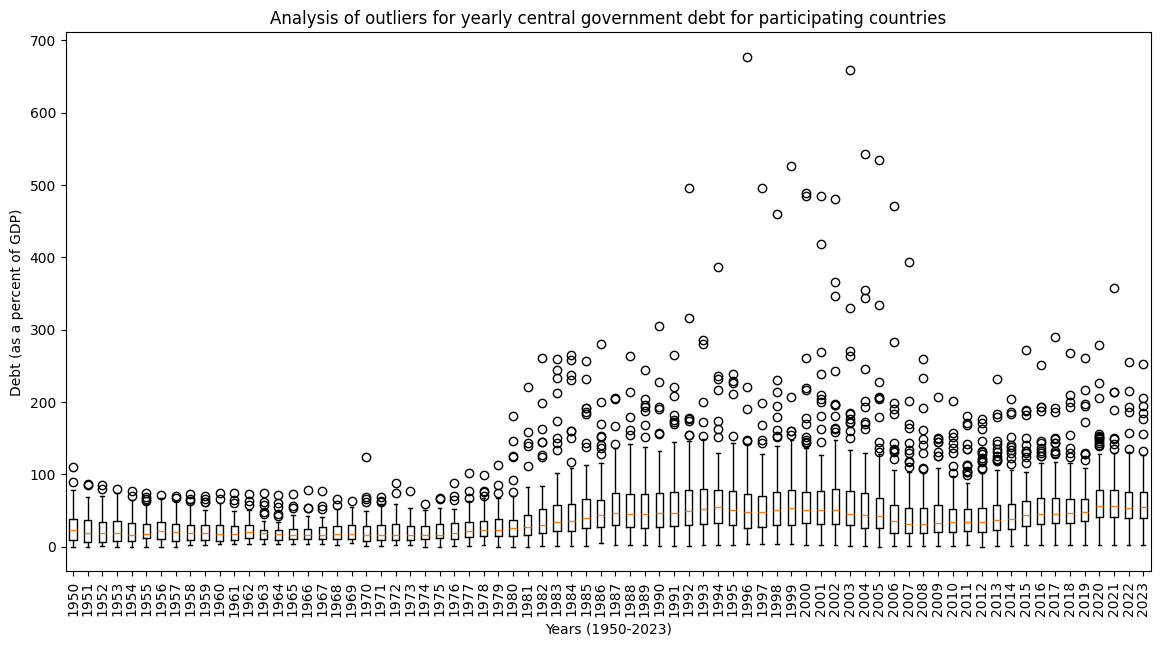

In [93]:
plt.rcParams["figure.figsize"] = (14, 7)

central_govt_debt_boxplot_data = []
years = central_govt_debt_df.drop(central_govt_debt_df.columns[0], axis=1)

for column in years:
  x = central_govt_debt_df[column]
  x.replace("no data", pd.NA, inplace=True)
  x.dropna(inplace=True)
  central_govt_debt_boxplot_data.append(x)

plt.boxplot(central_govt_debt_boxplot_data, tick_labels = years.columns)
plt.xticks(rotation=90)
plt.xlabel("Years (1950-2023)")
plt.ylabel("Debt (as a percent of GDP)")
plt.title("Analysis of outliers for yearly central government debt for participating countries")
plt.show()

This seems super interesting, but it doesn't tell us that much. Just because there are more outliers from ~1990 - ~2010 doesn't mean that something crazy happened. Maybe countries that routinely had outliers provided data to the dataset during that time period, and for whatever reason they don't anymore. To help answer this, let's take a look at the number of countries that provided data every year.

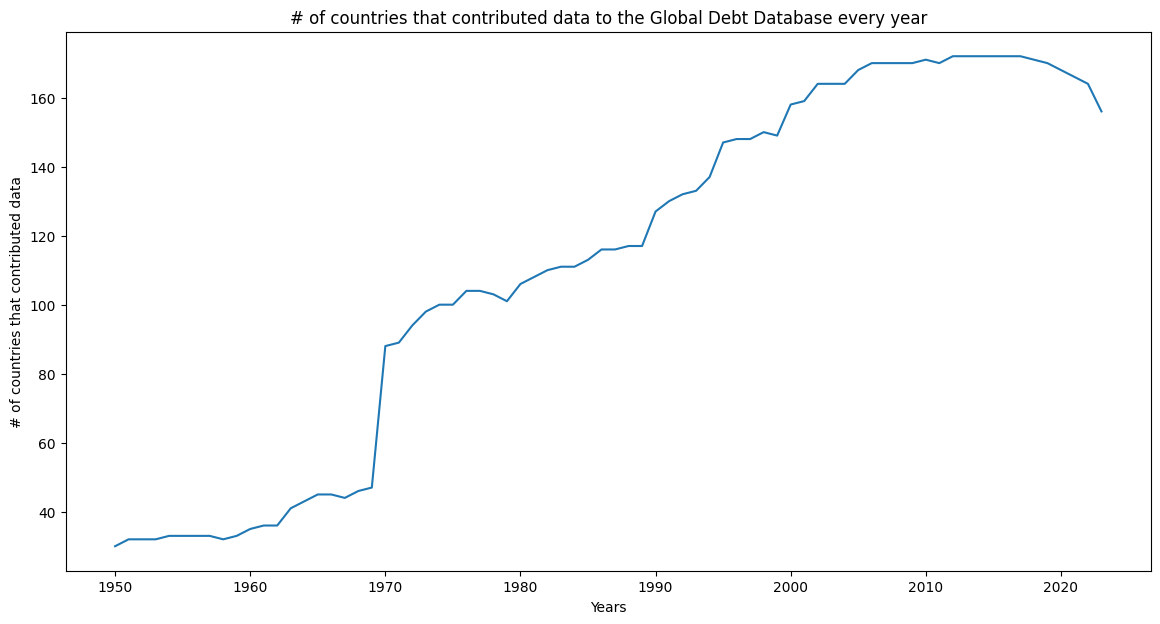

In [101]:
central_govt_debt_num_countries = []
years = central_govt_debt_df.drop(central_govt_debt_df.columns[0], axis=1)

for column in years:
  x = central_govt_debt_df[column]
  x.replace("no data", pd.NA, inplace=True)
  x.dropna(inplace=True)
  central_govt_debt_num_countries.append(len(x))

plt.plot(years.columns, central_govt_debt_num_countries)
plt.xlabel("Years")
plt.ylabel("# of countries that contributed data")
plt.title("# of countries that contributed data to the Global Debt Database every year")
plt.show()

This is interesting, but it doesn't really help us. After creating this chart, I realized that there's not really an easy way to determine if adding certain countries caused that spike in outliers. Additionally, since this doesn't directly align with my research question, I don't see it as a topic worth pursuing.